In [10]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from google.colab import files

In [ ]:
# uploaded = files.upload()

In [2]:
mag0_ml = {12: {'linear': 1112.1768707905035,
  'svr': 1293.9095878158694,
  'arima': 910.1674401934214},
 24: {'linear': 609.2166225603385,
  'svr': 347.4678786285736,
  'arima': 1053.3255723507982},
 48: {'linear': 488.7656752469378,
  'svr': 356.7385402593503,
  'arima': 1285.7940642517324},
 72: {'linear': 417.613937967376,
  'svr': 403.8567358802981,
  'arima': 1075.8109882013366},
 96: {'linear': 276.367047719654,
  'svr': 268.15375089314466,
  'arima': 1128.7244710152436},
 120: {'linear': 231.78906983766913,
  'svr': 192.21645209764384,
  'arima': 1184.7034184729932}}

mag0_dl = [(12, (479.3632866415254, 76.4624516936458)),
 (24, (268.8570219231148, 19.456021427320714)),
 (48, (265.3088626481996, 17.88675139036141)),
 (72, (203.95446215282897, 21.266907024763686)),
 (96, (145.34440246588008, 4.513025816289825)),
 (120, (138.54504296763838, 15.173647594912955))]

mag0_lstm = [(12, (373.38549540022615, 56.0580931888995)),
 (24, (267.7390402952428, 10.025285991116677)),
 (48, (170.49969881670967, 29.318614588548883)),
 (72, (175.04842859451122, 19.924843511360276)),
 (96, (145.0584805121194, 5.912276090048935)),
 (120, (133.8616751916856, 25.32809740045672))]

mag0_lstm_att = [(12, (304.9676271660144, 48.51143053753405)),
 (24, (297.1594782211172, 28.813036173874544)),
 (48, (192.42579273493433, 34.75237051371947)),
 (72, (155.99032269823377, 15.550628071480713)),
 (96, (162.38118591632514, 17.041311656002947)),
 (120, (127.50934749472783, 18.589674481294356))]

In [6]:
rmses = [
         (12, {
             'arima': 910.1674401934214,
             'linear': 1112.1768707905035,
             'svr': 1293.9095878158694,
             'mlp': 479.3632866415254,
             'lstm': 373.38549540022615,
             'lstm_att': 304.9676271660144
         }),
         (24, {
             'arima': 1053.3255723507982,
             'linear': 609.2166225603385,
             'svr': 347.4678786285736,
             'mlp': 268.8570219231148,
             'lstm': 267.7390402952428,
             'lstm_att': 297.1594782211172
         }),
         (48, {
             'arima': 1285.7940642517324,
             'linear': 488.7656752469378,
             'svr': 356.7385402593503,
             'mlp': 265.3088626481996,
             'lstm': 170.49969881670967,
             'lstm_att': 192.42579273493433
         }),
         (72, {
             'arima': 1075.8109882013366,
             'linear': 417.613937967376,
             'svr': 403.8567358802981,
             'mlp': 203.95446215282897,
             'lstm': 175.04842859451122,
             'lstm_att': 155.99032269823377
         }),
         (96, {
             'arima': 1128.7244710152436,
             'linear': 276.367047719654,
             'svr': 268.15375089314466,
             'mlp': 145.34440246588008,
             'lstm': 145.0584805121194,
             'lstm_att': 162.38118591632514
         }),
         (120, {
             'arima': 1184.7034184729932,
             'linear': 231.78906983766913,
             'svr': 192.21645209764384,
             'mlp': 138.54504296763838,
             'lstm': 133.8616751916856,
             'lstm_att': 127.50934749472783
         })
]

In [4]:
mags = ['mag>=0', 'mag>=2.5', 'mag>=4.5', 'mag>5.5', '2.5<=mag<4.5', '4.5<=mag<6.0', '6.0<=mag<8.0']
regions = ['12 regions', '24 regions', '48 regions', '72 regions', '96 regions', '120 regions']
models = ['ARIMA', 'Linear Regression', 'Support Vector Regressor (SVR)', 'MLP', 'LSTM', 'LSTM Attention']

In [9]:
rmses[0][1].keys()

dict_keys(['arima', 'linear', 'svr', 'mlp', 'lstm', 'lstm_att'])

In [ ]:
def plot_result(data):
  model_names = data[0][1].keys()
  

In [5]:
for idx in regions:
  for idy in mags:
    print(f'{idx} {idy}')

12 regions mag>=0
12 regions mag>=2.5
12 regions mag>=4.5
12 regions mag>5.5
12 regions 2.5<=mag<4.5
12 regions 4.5<=mag<6.0
12 regions 6.0<=mag<8.0
24 regions mag>=0
24 regions mag>=2.5
24 regions mag>=4.5
24 regions mag>5.5
24 regions 2.5<=mag<4.5
24 regions 4.5<=mag<6.0
24 regions 6.0<=mag<8.0
48 regions mag>=0
48 regions mag>=2.5
48 regions mag>=4.5
48 regions mag>5.5
48 regions 2.5<=mag<4.5
48 regions 4.5<=mag<6.0
48 regions 6.0<=mag<8.0
72 regions mag>=0
72 regions mag>=2.5
72 regions mag>=4.5
72 regions mag>5.5
72 regions 2.5<=mag<4.5
72 regions 4.5<=mag<6.0
72 regions 6.0<=mag<8.0
96 regions mag>=0
96 regions mag>=2.5
96 regions mag>=4.5
96 regions mag>5.5
96 regions 2.5<=mag<4.5
96 regions 4.5<=mag<6.0
96 regions 6.0<=mag<8.0
120 regions mag>=0
120 regions mag>=2.5
120 regions mag>=4.5
120 regions mag>5.5
120 regions 2.5<=mag<4.5
120 regions 4.5<=mag<6.0
120 regions 6.0<=mag<8.0


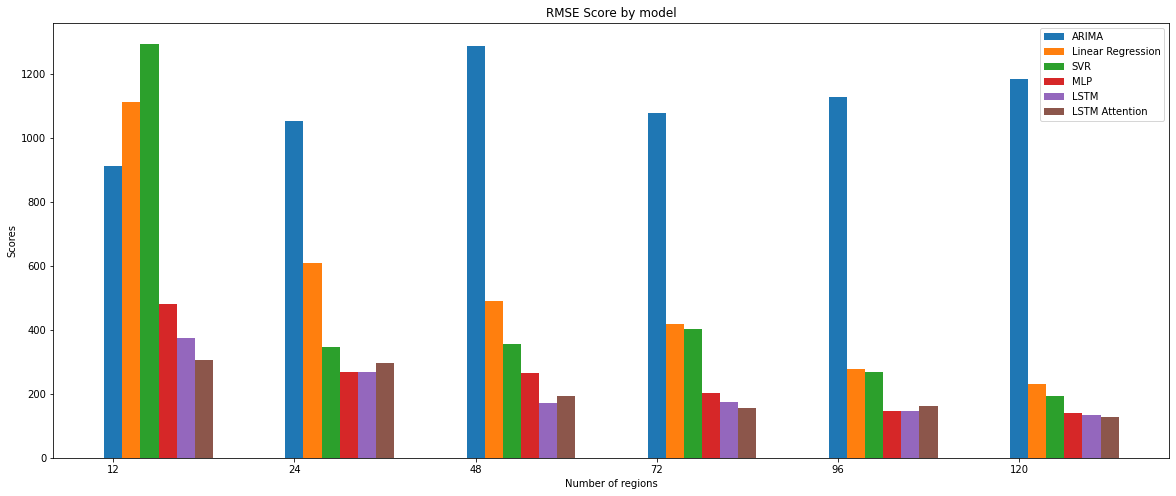

In [44]:
arimas = []
linears = []
svrs = []
mlps = []
lstms = []
lstm_atts = []

for i in rmses:
  arimas.append(i[1]['arima'])
  linears.append(i[1]['linear'])
  svrs.append(i[1]['svr'])
  mlps.append(i[1]['mlp'])
  lstms.append(i[1]['lstm'])
  lstm_atts.append(i[1]['lstm_att'])

labels = ['12', '24', '48', '72', '96', '120']
x = np.arange(len(labels))
bar1 = np.arange(len(arimas))

width = 0.1  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x + 0.0, arimas, width, label='ARIMA')
rects2 = ax.bar(x + 0.1, linears, width, label='Linear Regression')
rects3 = ax.bar(x + 0.2, svrs, width, label='SVR')
rects4 = ax.bar(x + 0.3, mlps, width, label='MLP')
rects5 = ax.bar(x + 0.4, lstms, width, label='LSTM')
rects6 = ax.bar(x + 0.5, lstm_atts, width, label='LSTM Attention')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_xlabel('Number of regions')
ax.set_title('RMSE Score by model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#fig.tight_layout()
fig.set_size_inches(20, 8)

plt.show()

In [51]:
lstm_atts

[304.9676271660144,
 297.1594782211172,
 192.42579273493433,
 155.99032269823377,
 162.38118591632514,
 127.50934749472783]